In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df= pd.read_csv("/home/dedsec/Desktop/dev/python/titanic-passengers.csv", delimiter=";")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
#general info
print("shape : ", df.shape)
print("columns : ", df.columns)
print("types : ", df.dtypes)
df.describe()


shape :  (891, 12)
columns :  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
types :  PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#data cleaning 
df.fillna(df.mean(), inplace=True)
df.head(30)

/tmp/ipykernel_34662/1401777691.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.000000,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.000000,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.000000,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.500000,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.000000,1,0,SC/AH 3085,26.0000,NaN,S


In [5]:
#highest frequency instead of NaN in categorical 
df.Cabin= df["Cabin"].fillna(df["Cabin"].mode().iloc[0])
df.Embarked= df.Embarked.fillna(df.Embarked.mode().iloc[0])


#binary values
df["isSurvived"]= df.Survived.map({"Yes":1, "No":0})
df["isMale"]= df.Sex.map({"male":1, "female":0})

In [6]:
#verification
print(df.columns)
print(df.dtypes)

df.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'isSurvived', 'isMale'],
      dtype='object')
PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
isSurvived       int64
isMale           int64
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isSurvived,isMale
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,B96 B98,S,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,B96 B98,S,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,B96 B98,S,0,0
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,0,1


(0.0, 60.0)

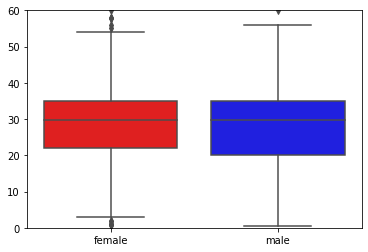

In [7]:
#survived : age disrtibution : Sex
survivedFemales=df[(df.Survived=="Yes") & (df.Sex=="female")]
survivedMales=df[(df.Survived=="Yes") & (df.Sex=="male")]


ax1=sns.boxplot(data=[pd.DataFrame(survivedFemales.Age),pd.DataFrame(survivedMales.Age)], palette=["red", "blue"])
ax1.set_xticklabels(labels=["female", "male"])
ax1.set_ylim(0,60)



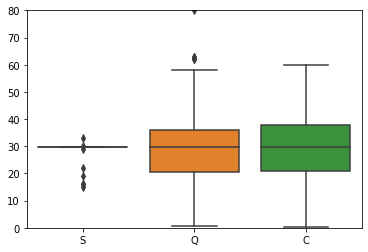

In [8]:
#survived age distribution : Embarked
survivedS=df[(df.Survived=="Yes") & (df.Embarked=="Q")]
survivedQ=df[(df.Survived=="Yes") & (df.Embarked=="S")]
survivedC=df[(df.Survived=="Yes") & (df.Embarked=="C")]

ax2=sns.boxplot(data=[pd.DataFrame(survivedS.Age),pd.DataFrame(survivedQ.Age),pd.DataFrame(survivedC.Age) ]) 
ax2.set_xticklabels(labels=["S", "Q", "C"])
ax2.set_ylim(0,80)

plt.show()



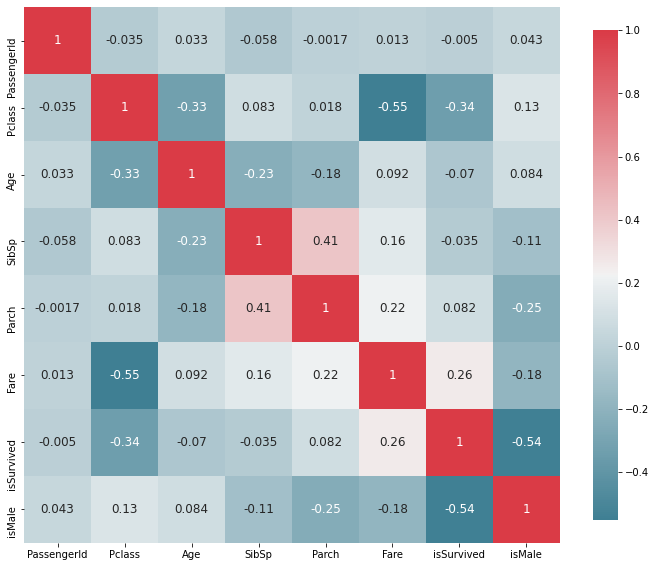

In [9]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)
#the function plots a heatmap that represents clearly the correlation between 
#every 2 columns 

#the columns pclass and fare are ata certain point negatively correlated
#the more the correlation goes near to zero the weaker it is


In [10]:
df.groupby("Pclass").mean()
#PassengerId is useless
#Survival rate of Pclass1 > Pclass2 > Pclass3 
#males are better at surviving :p (isMale mean > 0.5)  

,PassengerId,Age,SibSp,Parch,Fare,isSurvived,isMale
Pclass,,,,,,,
1,461.597222,37.048118,0.416667,0.356481,84.154687,0.629630,0.564815
2,445.956522,29.866958,0.402174,0.380435,20.662183,0.472826,0.586957
3,439.154786,26.403259,0.615071,0.393075,13.675550,0.242363,0.706721


<AxesSubplot:xlabel='Title', ylabel='Count'>

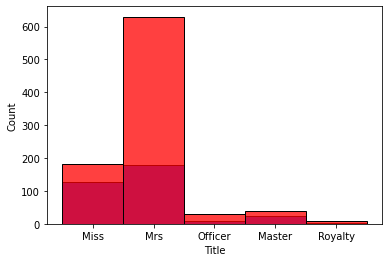

In [45]:
#creating title column
def get_title(name):
    clean_name= name.split(",")[1]
    title_dict={"Capt":"Officer","Col":"Officer","Major":"Officer","Dr":"Officer","Rev":"Officer", "Jonkheer":"Royalty" ,"Don":"Royalty","Sir" :"Royalty","Lady" :"Royalty","the Countess":"Royalty","Dona":"Royalty","Mme":"Miss","Mlle":"Miss","Miss" :"Miss","Ms":"Mrs","Mr" :"Mrs","Mrs" :"Mrs","Master" :"Master"}
    for short in title_dict:
        if short in name:
            return title_dict[short]

df["Title"]= pd.Series(df.Name.map(lambda name : get_title(name)))
#droping column Name
df.drop("Name", axis=1)
df.groupby("Title").mean().isSurvived
sns.histplot(df[df.isSurvived==1].Title, color="b")
sns.histplot(df.Title, color="r")

#the survical rate is not correlated with the title (no significant or meaningful pattern)

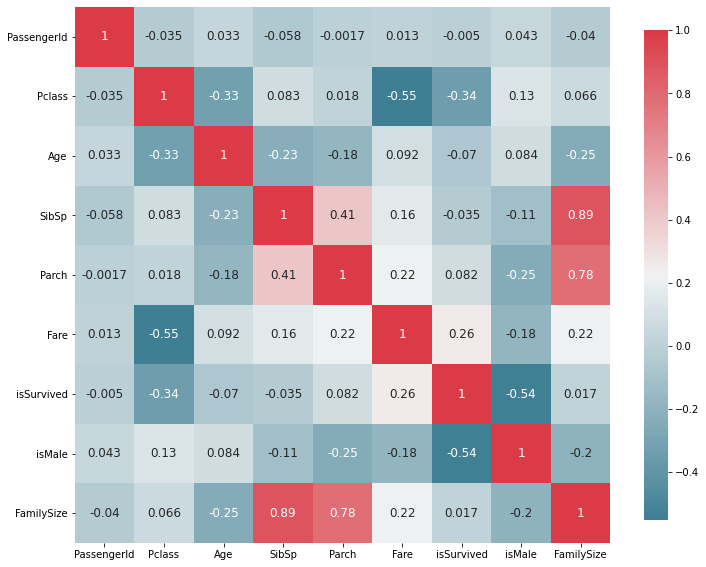

In [46]:
df["FamilySize"]=df.Parch+df.SibSp
plot_correlation_map(df)
#family size isnt really useful, because the very weak correlation
#  with other features (sibsp and parch don't count logically) 